# Project PICOM

## Import the libraries and files

In [ ]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#Import the files
camera_df = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Cameras.shp")
rivieres = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Rivieres.shp")
roads = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Reseau_Routier.shp")
railroad = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Reseau_Ferroviaire.shp")
slope = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Pente.shp")
landcover = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Type_Couverture.shp")
sol = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\utilisation_territoire2.shp")


In [ ]:
#export the camera dataframe
camera_df.to_file(r"C:\Users\thier\Downloads\Projet\Projet\points.shp", )
camera_df

In [ ]:
roads.plot()    

In [ ]:
camera_df

In [ ]:
camera_df = camera_df.set_index("Site")

In [ ]:
camera_df.plot()

In [ ]:
#Make sure the projection is the right one
camera_df = camera_df.to_crs('EPSG:26918')

### Create buffers of 500m, 1km and 2km

In [ ]:
#Create buffers for each cameras
buffered_geometries_500m = camera_df.geometry.apply(lambda geom: geom.buffer(500))
buffered_geometries_1km = camera_df.geometry.apply(lambda geom: geom.buffer(1000))
buffered_geometries_2km = camera_df.geometry.apply(lambda geom: geom.buffer(2000))

# Create GeoDataFrames for each buffer
buffered_camera_df_500m = gpd.GeoDataFrame(geometry=buffered_geometries_500m, crs=camera_df.crs)
buffered_camera_df_1km = gpd.GeoDataFrame(geometry=buffered_geometries_1km, crs=camera_df.crs)
buffered_camera_df_2km = gpd.GeoDataFrame(geometry=buffered_geometries_2km, crs=camera_df.crs)


In [ ]:
#Export the buffers shp
buffered_camera_df_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_500m.shp")
buffered_camera_df_1km.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_1km.shp")
buffered_camera_df_2km.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_2km.shp")

In [ ]:
buffered_camera_df_500m = buffered_camera_df_500m.reset_index().rename(columns={'index': 'camera'})
#buffered_camera_df_500m = buffered_camera_df_500m.rename(columns={'Site': 'camera'}, inplace=True)

In [ ]:
buffered_camera_df_500m

In [ ]:
# Create a new column 'id' with index values for 500m, 1km and 2km buffers
buffered_camera_df_500m['id'] = buffered_camera_df_500m.index
buffered_camera_df_500m
buffered_camera_df_1km['id'] = buffered_camera_df_1km.index
buffered_camera_df_1km
buffered_camera_df_2km['id'] = buffered_camera_df_2km.index
buffered_camera_df_2km

## Rivers

### Set the rivers shp projection

In [ ]:
print("CRS of rivieres:", rivieres.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_500m.crs)

In [ ]:
if rivieres.crs is None:
    rivieres.crs = 'EPSG:26918'
rivieres = rivieres.to_crs(buffered_camera_df_500m.crs)

### Rivers buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

# Assuming you have a GeoDataFrame called 'rivieres'
for selected_buffer_index in range(len(buffered_camera_df_500m)):
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(rivieres, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    #clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivieres.crs)

# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_500m.csv", index=False)

# Export the clipped results GeoDataFrame to a shapefile
#clipped_results_gdf.to_file(r"C:\Users\thier\Downloads\Projet\Projet\rivers_500m.shp")


### Rivers buffers 1km   

In [ ]:
results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

# Assuming you have a GeoDataFrame called 'rivieres'
for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(rivieres, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    #clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivieres.crs)
# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_1km.csv", index=False)

### Rivers buffers 2km

In [ ]:
results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

# Assuming you have a GeoDataFrame called 'rivieres'
for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(rivieres, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    #clipped_rivieres.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivieres.crs)

results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_2km.csv", index=False)


### ALL 3 buffers at the same time with a for loop

In [ ]:
import openpyxl

In [ ]:
import geopandas as gpd
import pandas as pd

def process_buffers(buffer_df, buffer_name, rivers_gdf, output_csv_path):
    results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])
    clipped_results_gdf = gpd.GeoDataFrame()

    for selected_buffer_index in range(len(buffer_df)):
        selected_buffer = buffer_df.iloc[selected_buffer_index:selected_buffer_index + 1]
        clipped_shp = gpd.overlay(rivers_gdf, selected_buffer, how='intersection')
        clipped_length = clipped_shp.length.sum()
        print(f"{buffer_name} - Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")

        results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
        clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivers_gdf.crs)

    results_df.to_csv(output_csv_path, index=False)

process_buffers(buffered_camera_df_500m, "Rivers buffers 500m", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_500m_test2.csv")
process_buffers(buffered_camera_df_1km, "Rivers buffers 1km", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_1km_test2.csv")
process_buffers(buffered_camera_df_2km, "Rivers buffers 2km", rivieres, r"C:\Users\thier\Downloads\Projet\\Projet\rivers_buffers_2km_test2.csv")

## Roads

In [ ]:
print("CRS of roads:", roads.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if roads.crs is None:
    roads.crs = 'EPSG:26918'
roads = roads.to_crs(buffered_camera_df_1km.crs)

### Roads buffers 500m

(                                               geometry       length
 Site                                                                
 10    MULTILINESTRING Z ((672684.836 5139807.747 0.0...  1935.690840
 11    MULTILINESTRING Z ((672684.836 5139807.747 0.0...  3148.707526
 12    MULTILINESTRING Z ((673745.602 5141057.146 0.0...  1593.536134
 14    MULTILINESTRING Z ((679009.018 5137601.307 0.0...  5508.686448
 16    MULTILINESTRING Z ((674937.964 5130138.072 0.0...  2158.177528
 18A   MULTILINESTRING Z ((676384.528 5129064.622 0.0...  4548.025878
 18B   MULTILINESTRING Z ((676384.528 5129064.622 0.0...  3732.370481
 19    MULTILINESTRING Z ((674951.616 5130159.944 0.0...  2210.834810
 2     MULTILINESTRING Z ((660534.888 5146083.313 0.0...  1460.149247
 20A   MULTILINESTRING Z ((681076.456 5133524.369 0.0...  4649.275737
 20B   MULTILINESTRING Z ((681076.456 5133524.369 0.0...  4649.275737
 4     MULTILINESTRING Z ((664408.176 5148626.559 0.0...  1906.369762
 5     MULTILINESTRI

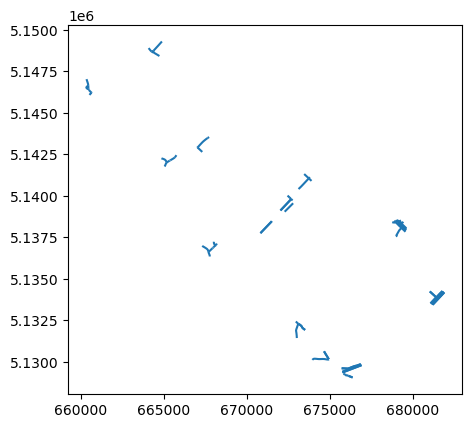

In [493]:
import geopandas as gpd
import pandas as pd

#Join both dataframe together
roads_buffers_join_500m = gpd.sjoin(roads, buffered_camera_df_500m, how='inner', predicate='intersects')

#Clip the joined dataframe with the buffer
roads_500m = roads_buffers_join_500m.clip(buffered_camera_df_500m)
#Calculate the length of the roads
roads_500m['length'] =roads_500m.geometry.length
'''roads_500m_grouped = roads_500m.groupby('Site')['length'].sum()'''

#Clean the dataframe
roads_500m_clean = roads_500m[['Site', 'length', 'geometry']]
#Dissolve the dataframe by camera
roads_500m_sum = roads_500m_clean.dissolve(by='Site', aggfunc='sum')

#Export in shp or CSV
roads_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.shp")
roads_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.csv")

#Print the result and plot it
roads_500m_sum, roads_500m_sum.plot()


In [ ]:
roads_buffers_500m_merge = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_df.shp")

In [ ]:
roads_buffers_500m_merge.plot()

In [ ]:
import whitebox
import os

# Initialize WhiteboxTools
wbt = whitebox.WhiteboxTools()

In [ ]:
wbt.clip(
    r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_df.shp", 
    r"C:\Users\thier\Downloads\Projet\Projet\buffers_500m.shp", 
    r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_17.shp", 
   
)

In [ ]:
df = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_17.shp")

In [ ]:
df.sort_values(ascending=False, by='IdRte').head(10)

In [ ]:
import geopandas as gpd

df['length'] = df.geometry.length
length_by_camera = df.groupby('Site')['length'].sum()
length_by_camera

In [ ]:

clean_df = df[["Camera", "geometry", "Shape_Leng", "length"]]

In [ ]:
clean_df = sol_500m.dissolve(by='Camera', aggfunc='sum')

In [ ]:
df.plot()

In [ ]:
clean_df.to_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_18.shp")

In [ ]:
roads["Shape_Leng"].sum()

In [ ]:

# Dissolve the GeoDataFrame based on the constant 'group' column
merged_roads = roads.dissolve(by='group', aggfunc=sum)


In [ ]:
merged_roads

In [491]:
#Join both dataframe together
roads_buffers_join_500m = gpd.sjoin(roads, buffered_camera_df_500m, how='inner', predicate='intersects')

#Clip the joined dataframe with the buffer
roads_500m = roads_buffers_join_500m.clip(buffered_camera_df_500m)
#Calculate the length of the roads
roads_500m['length'] =roads_500m.geometry.length
'''roads_500m_grouped = roads_500m.groupby('Site')['length'].sum()'''

#Clean the dataframe
roads_500m_clean = roads_500m[['Site', 'length', 'geometry']]
#Dissolve the dataframe by camera
roads_500m_sum = roads_500m_clean.dissolve(by='Site', aggfunc='sum')
roads_500m_sum

#Export in shp or CSV
roads_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.shp")
roads_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.csv")


<Axes: >

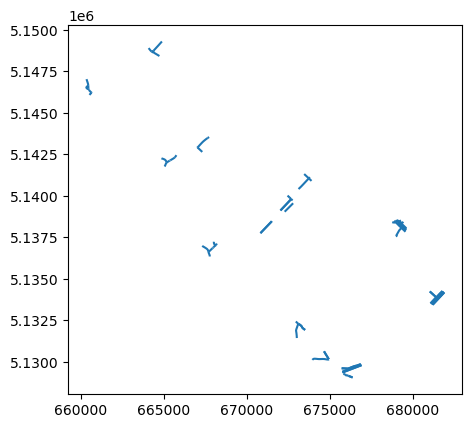

In [487]:
roads_500m_sum.plot()


In [480]:
roads_500m

,IdRte,Version,NomRte,NoRte,ClsRte,CaractRte,Cls_CheFor,Cls_RAT,An_Classi,No_Chefor,...,EtatRev,Dossi_Pont,Cap_Port,Stat_Pont,AQRP_UUID,Shape_Leng,index_righ,Site,geometry,length
41,3a61ac3d18a14119a3b79acfef3be91f,AQ20230601,Rue Notre-Dame Ouest,138.0,Nationale,None,NF,None,None,None,...,Revêtue,None,None,None,b7ee417c-08f3-4cd5-819c-ad8df12e0624,468.723752,8,18A,"LINESTRING Z (676384.528 5129064.622 0.000, 67...",269.436846
28,3a61ac3d18a14119a3b79acfef3be91f,AQ20230601,Rue Notre-Dame Ouest,138.0,Nationale,None,NF,None,None,None,...,Revêtue,None,None,None,b7ee417c-08f3-4cd5-819c-ad8df12e0624,468.723752,9,18B,"LINESTRING Z (676384.528 5129064.622 0.000, 67...",269.436846
40,3afd2aa05fae4fe1b557a179ba1391c3,AQ20230601,Rue des Goélands,0.0,Locale,None,NF,None,None,None,...,INC,None,None,None,30c5f155-268d-46a3-abfe-e9fe79e93522,169.096993,8,18A,"LINESTRING Z (676019.168 5129206.024 0.000, 67...",67.044764
47,905a2cfef14a4434931e21bbf8628ede,AQ20230601,Rue Notre-Dame Ouest,138.0,Nationale,None,NF,None,None,None,...,Revêtue,None,None,None,db5ab4ee-5ee2-4632-9baf-7c07a4fc39bf,122.331730,8,18A,"LINESTRING Z (676133.372 5129162.177 0.000, 67...",122.331730
38,373994bdebf04270a7b0488985a61d30,AQ20230601,Rue Notre-Dame Ouest,138.0,Nationale,None,NF,None,None,None,...,Revêtue,None,None,None,d5d70b8a-910b-4b3a-9ddc-e6f025b9625e,100.582414,8,18A,"LINESTRING Z (676019.168 5129206.024 0.000, 67...",100.582414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,f5397f301bf840799e9b12811b73906e,AQ20230601,Boulevard Notre-Dame,350.0,Régionale,None,NF,None,None,None,...,Revêtue,None,None,None,008bae4e-8f87-461c-aad7-35ba0bded4b2,4.512611,14,4,"LINESTRING Z (664281.855 5148697.019 0.000, 66...",4.512611
77,d5fcd14785f34285b0bb2c6bacfccbcb,AQ20230601,Voie,153.0,Régionale,Bretelle,NF,None,None,None,...,Revêtue,None,None,None,cff84524-f154-4eb1-baa4-5d18067acb98,100.845473,14,4,"LINESTRING Z (664367.898 5148712.152 0.000, 66...",100.845473
80,d6feeea3f9114b359b31e1ee61f85b39,AQ20230601,Boulevard Trudel Ouest,153.0,Régionale,None,NF,None,None,None,...,Revêtue,None,None,None,770f275e-c44e-455d-bc1b-d6509396155d,38.742352,14,4,"LINESTRING Z (664393.424 5148741.291 0.000, 66...",38.742352
84,adf78927ce2d49a4bfd46c388d46f2a6,AQ20230601,Boulevard Notre-Dame,350.0,Régionale,None,NF,None,None,None,...,Revêtue,None,None,None,907603c4-bdb6-4916-8474-22e7532129ec,595.877249,14,4,"LINESTRING Z (664278.107 5148699.531 0.000, 66...",270.990653


In [ ]:
sol_500m.dissolve(by='Site', aggfunc='sum')

In [ ]:
merged_roads.to_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_14.shp")

In [ ]:
sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_11.shp")

In [ ]:
sol_500m.groupby(["Camera"])["Shape_Leng"].sum().reset_index()

In [ ]:
#Clip the roads with the buffers
roads_500m_overlay = roads_buffers_500m_merge.overlay(buffered_camera_df_500m, how='intersection')

roads_500m_overlay

In [ ]:
sol_500m['length'] =sol_500m.geometry.length
length_by_camera = sol_500m.groupby('Site')['length'].sum()
length_by_camera

In [ ]:

sol_500m['length'] = sol_500m.geometry.length
length_by_camera2 = roads_500m_overlay.groupby('Site1')['length'].sum()
length_by_camera2

In [ ]:
roads_500m_overlay.sort_values(ascending=False, by='IdRte').head(10)

In [ ]:
df_500m_clip = roads.clip(buffered_camera_df_500m)  

In [ ]:
df_500m_clip.sort_values(ascending=False, by='IdRte').head(10)

In [ ]:
#Clip the roads with the buffers
sol_500m = roads.overlay(buffered_camera_df_500m, how='intersection')
#Clean the dataframe    
df_clean = ["Camera", "Shape_Leng", "geometry", "ClsRte"]
sol_500m= sol_500m[df_clean]
#Aggregate the data
df_sol_500m = sol_500m.dissolve(by='Camera', aggfunc='sum').drop(columns="ClsRte").reset_index()
#Export the file in shp or csv
df_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_10.shp")
#df_sol_500m.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_9.csv", index=False)

In [ ]:
df_sol_500m

### Roads buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(roads, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=roads.crs)

# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_1km.csv", index=False)

### Roads buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(roads, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    #You can plot the result
    #clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=roads.crs)

# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_2km.csv", index=False)

## Railroads

In [ ]:
print("CRS of roads:", railroad.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if railroad.crs is None:
    railroad.crs = 'EPSG:26918'
railroad = railroad.to_crs(buffered_camera_df_1km.crs)

### Railroad buffer 500m

In [ ]:
import geopandas as gpd
import pandas as pd

results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

for selected_buffer_index in range(len(buffered_camera_df_500m)):
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(railroad, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=railroad.crs)

# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_500m.csv", index=False)

### Railroad buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(railroad, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=railroad.crs)

# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_1km.csv", index=False)

### Railroad buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])

# Create an empty GeoDataFrame to store the clipped results
clipped_results_gdf = gpd.GeoDataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(railroad, selected_buffer, how='intersection')
    clipped_length = clipped_shp.length.sum()
    print(f"Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")
    clipped_shp.plot()
    results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
    clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=railroad.crs)

# Export the results DataFrame to a CSV file
results_df.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\railroad_buffers_2km.csv", index=False)

## Slope

In [ ]:
print("CRS of roads:", slope.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if slope.crs is None:
    slope.crs = 'EPSG:26918'
slope = slope.to_crs(buffered_camera_df_1km.crs)

### Slope buffer 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming buffered_camera_df_500m and slope are predefined GeoDataFrames

# Create an empty DataFrame for storing aggregated results
aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_500m)):
    # Select a single buffer zone
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]

    # Calculate the intersection
    clipped_shp = gpd.overlay(slope, selected_buffer, how='intersection')

    # Check if the required columns ('id', 'CL_PENT', 'SUPERFICIE') exist in clipped_shp
    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        # Group the data by 'id' and 'CL_PENT' and calculate the sum of 'SUPERFICIE'
        grouped_data = clipped_shp.groupby(['id', 'CL_PENT'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)

# Optional: You can group and sum again in case there are overlapping ids and CL_PENTs across different buffer zones
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_500m.csv", index=False)


In [ ]:
# Export the grouped data to a CSV file
grouped_data.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_500m.csv", index=False)

### Slope buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(slope, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'CL_PENT'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_1km.csv", index=False)

In [ ]:
buffered_camera_df_1km

### Slope buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(slope, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'CL_PENT'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_file(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_2km.shp")

## Landcover type

In [ ]:
import pandas as pd

In [ ]:
print("CRS of roads:", landcover.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
pd.set_option('display.max_columns', None)
landcover.head(20)

In [ ]:
landcover.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover.csv", index=False)

In [ ]:
#Clip the rivers with the buffers
clip_rivers_500m = gpd.clip(roads, buffered_camera_df_1km)
clip_rivers_500m

### Landcover buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_500m)):
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(landcover, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'TYPE_ECO'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover_buffers_500m.csv", index=False)
aggregated_results


### Landcover buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(landcover, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'TYPE_ECO'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover_buffers_1km.csv", index=False)
aggregated_results

### Landcover buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(landcover, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'TYPE_ECO'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover_buffers_2km.csv", index=False)
aggregated_results

## Utilisation du sol

### Check projection first


In [ ]:
print("CRS of roads:", sol.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_500m.crs)

### Sol buffers 500m

In [ ]:
buffered_camera_df_500m

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_500m)):
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(sol, selected_buffer, how='intersection')

    if 'Camera' in clipped_shp.columns and 'DESC_CAT' in clipped_shp.columns and 'Shape_Area' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['Camera', 'DESC_CAT'])['Shape_Area'].sum().reset_index()
        grouped_data = grouped_data.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_4.csv", index=False)
aggregated_results

In [ ]:
import fiona
fiona.supported_drivers 

In [ ]:
roads

In [ ]:
#Clip the roads with the buffers
sol_500m = gpd.overlay(roads, buffered_camera_df_500m, how='intersection')
#Clean the dataframe    
df_clean = ["Camera", "Shape_Leng", "geometry", "ClsRte"]
sol_500m= sol_500m[df_clean]
#Aggregate the data
df_sol_500m = sol_500m.dissolve(by='Camera', aggfunc='sum').drop(columns="ClsRte").reset_index()
#Export the file in shp or csv
#df_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_9.shp")
df_sol_500m.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_9.csv", index=False)


In [ ]:
test3 = df_sol_500m.rename(columns={'Shape_Leng': 'Longueur_m2'})

In [ ]:
test3

In [ ]:
print(type(df_sol_500m))

In [ ]:
grouped_sol_500m = grouped_sol_500m.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})


In [ ]:
import geopandas as gpd

# Create a GeoDataFrame from grouped_sol_500m
grouped_sol_500m_gdf = gpd.GeoDataFrame(grouped_sol_500m)

# Now you have a GeoDataFrame with the "geometry" column assigned


In [ ]:
grouped_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_5.shp")

In [ ]:
grouped_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_5.shp")

### Sol buffer 1km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(sol, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'DESC_CAT' in clipped_shp.columns and 'Shape_Area' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'DESC_CAT'])['Shape_Area'].sum().reset_index()
        grouped_data = grouped_data.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_1km.csv", index=False)
aggregated_results

### Sol buffer 2km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(sol, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'id' in clipped_shp.columns and 'Shape_Area' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['Site', 'DESC_CAT'])['Shape_Area'].sum().reset_index()
        grouped_data = grouped_data.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_2km.csv", index=False)
aggregated_results

In [ ]:
import geopandas as gpd
import pandas as pd

def process_buffers(buffer_df, buffer_name, rivers_gdf, output_csv_path):
    results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])
    clipped_results_gdf = gpd.GeoDataFrame()

    for selected_buffer_index in range(len(buffer_df)):
        selected_buffer = buffer_df.iloc[selected_buffer_index:selected_buffer_index + 1]
        clipped_shp = gpd.overlay(rivers_gdf, selected_buffer, how='intersection')
        clipped_length = clipped_shp.length.sum()
        print(f"{buffer_name} - Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")

        results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
        clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivers_gdf.crs)

    results_df.to_csv(output_csv_path, index=False)
    # Optionally save the GeoDataFrame as well
    # clipped_results_gdf.to_file(output_csv_path.replace('.csv', '.shp'))

# Assuming 'rivieres' is your rivers GeoDataFrame
# And you have buffered_camera_df_500m, buffered_camera_df_1km, buffered_camera_df_2km defined

process_buffers(buffered_camera_df_500m, "Rivers buffers 500m", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_500m_test.csv")
process_buffers(buffered_camera_df_1km, "Rivers buffers 1km", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_1km_test.csv")
process_buffers(buffered_camera_df_2km, "Rivers buffers 2km", rivieres, r"C:\Users\thier\Downloads\Projet\\Projet\rivers_buffers_2km_test.csv")
